In [1]:
from copy import copy
import seaborn as sns
import pandas as pd
import math

In [2]:
def take_inverse_samples(a, b, n):
    assert a < b and n > 1

    def f(x):
        return x ** 3 - 3 * x ** 2 - 17 * x + 22 + math.sin(x)

    h = (b - a) / (n - 1)
    table = []
    for i in range(n):
        xi = a + i * h
        table.append((f(xi), xi))

    return table

[Text(0.5, 0, 'y'), Text(0, 0.5, 'x')]

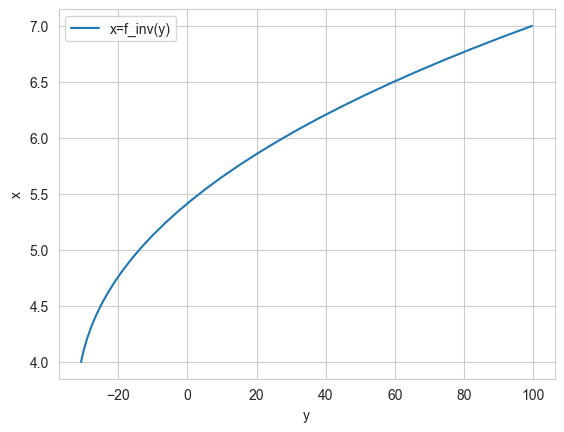

In [3]:
rendering_samples = take_inverse_samples(4, 7, 30)
rendering_dataframe = pd.DataFrame(((b) for a, b in rendering_samples), index=[a for a,b in rendering_samples], columns=['x=f_inv(y)'])
sns.lineplot(rendering_dataframe).set(xlabel='y', ylabel='x')

In [4]:
samples = take_inverse_samples(4, 5.8, 10)
pd.DataFrame(samples, columns=['yi', 'xi'])

,yi,xi
0,-30.756802,4.0
1,-29.103576,4.2
2,-26.647602,4.4
3,-23.337691,4.6
4,-19.124165,4.8
5,-13.958924,5.0
6,-7.795455,5.2
7,-0.588764,5.4
8,7.704733,5.6
9,17.127398,5.8


In [5]:
def get_divided_differences(samples, last_row=False, util=False):
    table = [[y for y, x in samples], [x for y, x in samples]]

    for o in range(len(table[0])-1):
        new_fd = []
        for i in range(len(table[-1]) - 1):
            new_fd.append((table[-1][i+1] - table[-1][i]) / (table[0][i+1+o] - table[0][i]))
        table.append(new_fd)

    if util:
        print('\t{:4}'.format('y'), end='')
        print('\t{:8}'.format('x'), end='')
        for i in range(1, len(table)-1):
            print('{:8}'.format('d' + str(i)), end='')
        print()

        for i in range(len(table[0])):
            print('{:8.4f}'.format(table[0][i]), end='')
            for j in range(1, len(table[0]) - i + 1):
                print('{:8.4f}'.format(table[j][i]), end='')
            print()

    return [df[-1 if last_row else 0] for df in table[2:]]

In [6]:
dds = get_divided_differences(samples, last_row=True, util=True)

	y   	x       d1      d2      d3      d4      d5      d6      d7      d8      d9      
-30.7568  4.0000  0.1210 -0.0096  0.0008 -0.0001  0.0000 -0.0000  0.0000 -0.0000  0.0000
-29.1036  4.2000  0.0814 -0.0036  0.0002 -0.0000  0.0000 -0.0000  0.0000 -0.0000
-26.6476  4.4000  0.0604 -0.0017  0.0001 -0.0000  0.0000 -0.0000  0.0000
-23.3377  4.6000  0.0475 -0.0009  0.0000 -0.0000  0.0000 -0.0000
-19.1242  4.8000  0.0387 -0.0006  0.0000 -0.0000  0.0000
-13.9589  5.0000  0.0324 -0.0004  0.0000 -0.0000
 -7.7955  5.2000  0.0278 -0.0002  0.0000
 -0.5888  5.4000  0.0241 -0.0002
  7.7047  5.6000  0.0212
 17.1274  5.8000


In [7]:
dds = dds[:2]
print(dds)

[0.021225418869761755, -0.00016311988611731986]


In [13]:
def get_p_by_dds(dds, ys, xs, reverse=False):
    dds = copy(dds)

    def p(y, util=False):
        if util:
            print(f'y = {y:.4f}')

        res = xs[-1 if reverse else 0]
        x_prod = 1

        if util:
            print(f'P(y) = {res:.4f}', end=' ')
            y_prints = ''

        for i, dd in enumerate(dds):
            x_prod *= y - ys[-i-1 if reverse else i]
            res += dd * x_prod

            if util:
                y_prints += f'(y-{ys[-i-1 if reverse else i]:.4f})'
                print(f'+ {dd:.4f}*{y_prints}', end=' ')

        return res

    return p

In [14]:
p = get_p_by_dds(dds, [y for y, x in samples], [x for y, x in samples], reverse=True)

In [15]:
p(0, True)

y = 0.0000
P(y) = 5.8000 + 0.0212*(y-17.1274) + -0.0002*(y-17.1274)(y-7.7047) 

5.414938175249858

[Text(0.5, 0, 'y'), Text(0, 0.5, 'x')]

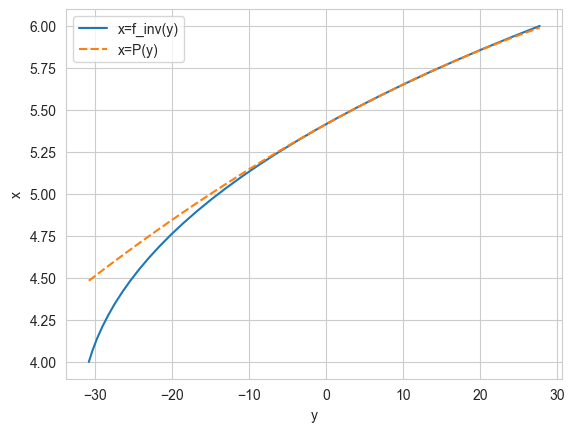

In [11]:
rendering_samples = take_inverse_samples(4, 6, 30)
rendering_dataframe = pd.DataFrame(((b, p(a)) for a, b in rendering_samples), index=[a for a,b in rendering_samples], columns=['x=f_inv(y)', 'x=P(y)'])
sns.lineplot(data=rendering_dataframe).set(xlabel='y', ylabel='x')

In [18]:
print('P2(0) = {:.5f}'.format(p(0)))

P2(0) = 5.41494
